# Fun with graphs

## 1. Import packages

In [1]:
# pandas
import pandas as pd

# numpy
import numpy as np

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
print(f"Matplotlib Version : {mpl.__version__}")
%matplotlib inline

# seaborn
import seaborn as sns # theme & dataset
print(f"Seaborn Version : {sns.__version__}")

Matplotlib Version : 3.7.1
Seaborn Version : 0.11.2


In [2]:
# %matplotlib (to display figures in new windows)
# %matplotlib inline (to display static images inline)
# %matplotlib notebook (to display zoomable images inline)

## 2. Import and load data

In [3]:
# load dataset
penguins_size = pd.read_csv('data/penguins_size.csv')

# drop null values
penguins_size = penguins_size.dropna()

# drop  "." in 'sex' column
penguins_size = penguins_size[penguins_size["sex"] != "."]

# display dataset
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_size['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

## 3. Set resolution

In [5]:
# dpi -> dots per inch
plt.rcParams['figure.dpi'] = 100

## 4. Anatomy of a figure

In [6]:
# library to display external images from url
from IPython.display import Image

# image source: https://matplotlib.org/stable/gallery/showcase/anatomy.html
Image(url='https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png', width=600, height=600)

## 5. Plots and subplots

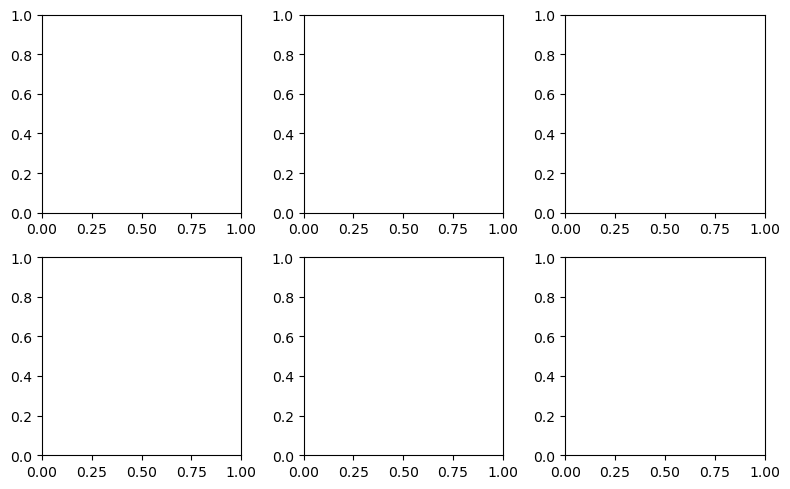

In [7]:
# create figure paired with axes (rows, columns)
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

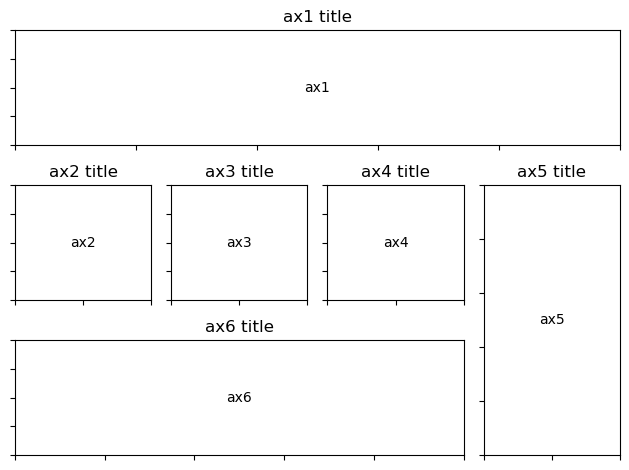

In [8]:
# subplot2grid

# annotate axes variable
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

# plot figure
fig = plt.figure()

# ((shape of the grid), (location to place axis within grid), ...)
ax1 = plt.subplot2grid((3,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((3,4), (1,0), colspan=1)
ax3 = plt.subplot2grid((3,4), (1,1), colspan=1)
ax4 = plt.subplot2grid((3,4), (1,2), colspan=1)
ax5 = plt.subplot2grid((3,4), (1,3), colspan=1,rowspan=2)
ax6 = plt.subplot2grid((3,4), (2,0), colspan=3)

# set title on ax
ax1.set_title('ax1 title')
ax2.set_title('ax2 title')
ax3.set_title('ax3 title')
ax4.set_title('ax4 title')
ax5.set_title('ax5 title')
ax6.set_title('ax6 title')

annotate_axes(fig)
fig.tight_layout()
plt.show()

## 6. Multiple lines

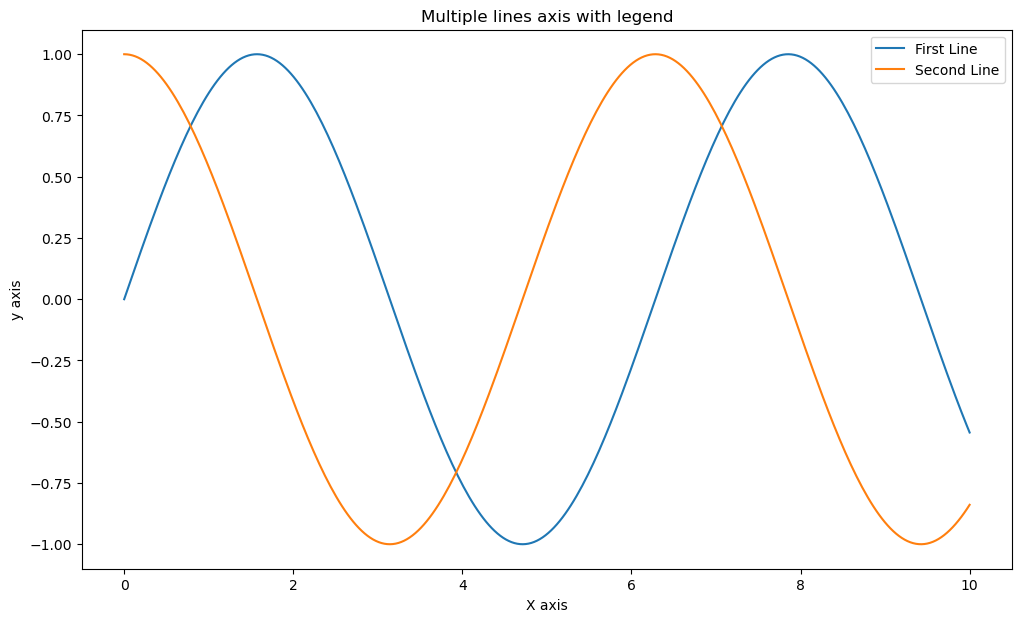

In [9]:
# np.linspace(start, stop, num)
x = np.linspace(0,10,300)

# sin and cos lines
y1 = np.sin(x)
y2 = np.cos(x)

# create subplot
fig, ax = plt.subplots(figsize=(12, 7))

# plot lines
plt.plot(x, y1, label='First Line')
plt.plot(x, y2, label='Second Line')

# labels, title, legend
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('Multiple lines axis with legend')
plt.legend()
plt.show()

## 7. Bar charts

In [10]:
# mean
peng_g = penguins_size.groupby('species').mean().reset_index()
peng_g

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.823973,18.347260,190.102740,3706.164384
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.568067,14.996639,217.235294,5092.436975


In [11]:
# transpose with index species
peng_g = peng_g.set_index('species').T
peng_g

species,Adelie,Chinstrap,Gentoo
culmen_length_mm,38.823973,48.833824,47.568067
culmen_depth_mm,18.347260,18.420588,14.996639
flipper_length_mm,190.102740,195.823529,217.235294
body_mass_g,3706.164384,3733.088235,5092.436975


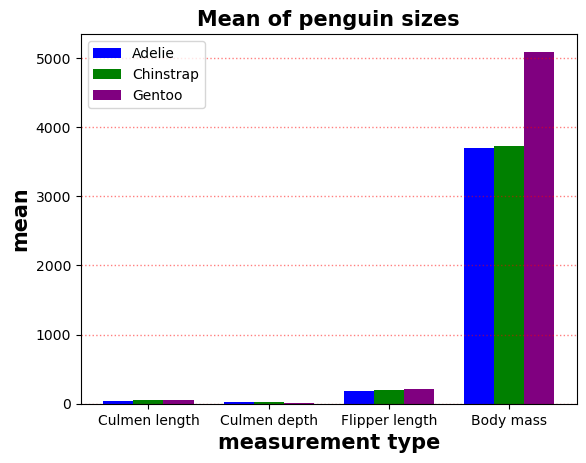

In [12]:
# create subplot
fig, ax = plt.subplots()

# set range
x = np.arange(4)

# set bar width
barWidth = 0.25

# create bars
plt.bar(x, peng_g['Adelie'], color='blue', label='Adelie', width = barWidth)
plt.bar(x+barWidth, peng_g['Chinstrap'], color='green', label='Chinstrap', width = barWidth)
plt.bar(x+barWidth*2, peng_g['Gentoo'], color='purple', label='Gentoo', width = barWidth)

# add grid lines
plt.grid(color='red', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)

# add labels, title, ticks, ticklabels, legend
plt.ylabel('mean', fontweight ='bold', fontsize = 15)  # labling y-axis
plt.xlabel('measurement type', fontweight ='bold', fontsize = 15)  # labling x-axis
plt.title('Mean of penguin sizes', fontweight ='bold', fontsize = 15)
ax.set_xticks(x+barWidth)
ax.set_xticklabels(('Culmen length', 'Culmen depth', 'Flipper length', 'Body mass'))
plt.legend()

# show plot
plt.show()

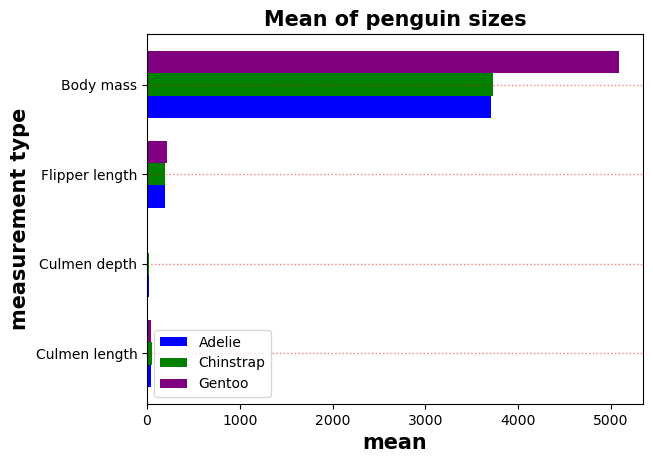

In [13]:
# same but plotted horizontally

# create subplot
fig, ax = plt.subplots()

# set range
y = np.arange(4)

# set bar height
barHeight = 0.25

# create bars (plt.barh)
plt.barh(y, peng_g['Adelie'], color='blue', label='Adelie', height = barHeight)
plt.barh(y+barWidth, peng_g['Chinstrap'], color='green', label='Chinstrap', height = barHeight)
plt.barh(y+barWidth*2, peng_g['Gentoo'], color='purple', label='Gentoo', height = barHeight)

# add grid lines
plt.grid(color='red', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)

# add labels, title, ticks, ticklabels, legend
plt.xlabel('mean', fontweight ='bold', fontsize = 15)  # labling x-axis
plt.ylabel('measurement type', fontweight ='bold', fontsize = 15)  # labling y-axis
plt.title('Mean of penguin sizes', fontweight ='bold', fontsize = 15)
ax.set_yticks(x+barHeight)
ax.set_yticklabels(('Culmen length', 'Culmen depth', 'Flipper length', 'Body mass'))
plt.legend()

# show plot
plt.show()

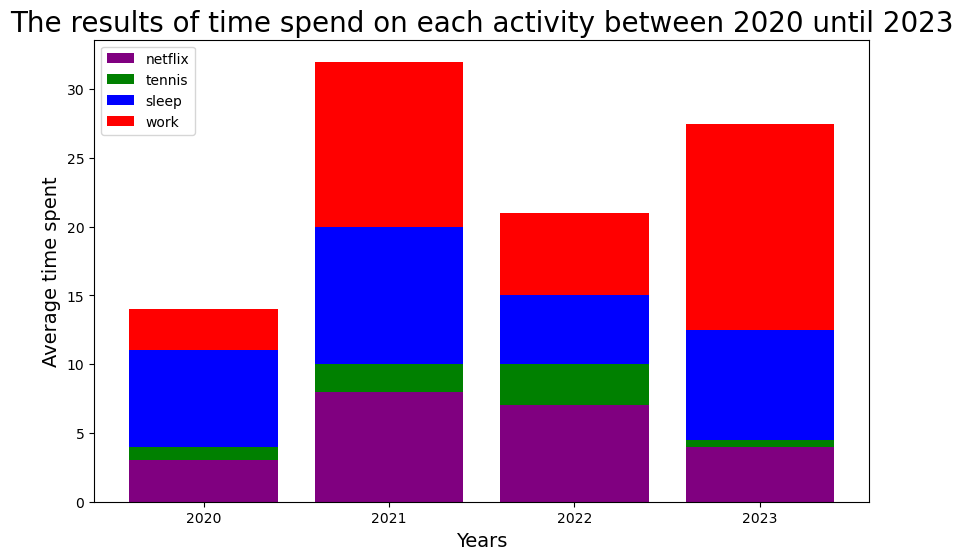

In [14]:
# stacked bars

# mockup avg. time spent per activity
years = ['2020', '2021', '2022', '2023']
netflix =  np.array([3, 8, 7, 4])
tennis = np.array([1, 2, 3, 0.5])
sleep =  np.array([7, 10, 5, 8])
work =  np.array([3, 12, 6, 15])

# create figure
plt.figure(figsize=(10, 6))

# stack bars
plt.bar(years, netflix, label='netflix', color='purple')
plt.bar(years, tennis, bottom=netflix, label='tennis', color='green')
plt.bar(years, sleep, bottom=netflix+tennis, label='sleep', color='blue')
plt.bar(years, work, bottom=netflix+tennis+sleep, label='work', color='red')

# plot layout
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average time spent', fontsize=14)
plt.title('The results of time spend on each activity between 2020 until 2023', fontsize=20)
plt.legend()
plt.show()

## 8. Pie charts

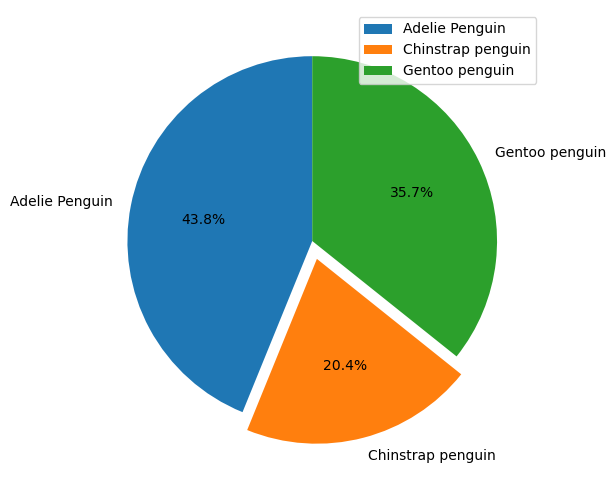

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

# separate selected slice
explode = [0.0, 0.10, 0.0]

# groupby per species count in %
penguin_spe = penguins_size.groupby('species').count().reset_index()
labels = ['Adelie Penguin', 'Chinstrap penguin' , 'Gentoo penguin']
plt.pie(penguin_spe['island'], labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

# autopct = to display value add % sign 
# shadow = True to add shadow
# startangle = define the angle where we want to initiate our pie, by default it's 0
# donut shape: wedgeprops={'width': (insert number try 0.2 or 0.4)}
plt.legend(labels)
plt.show()

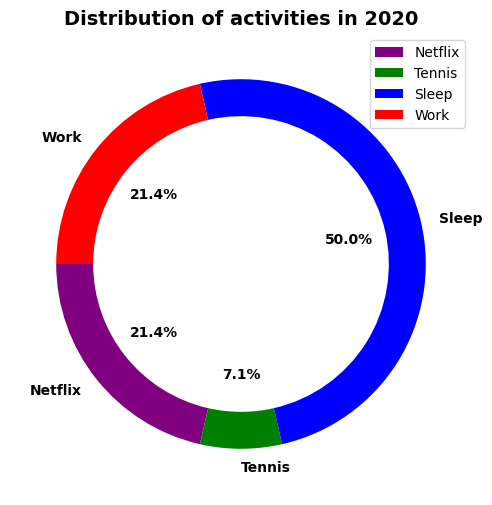

In [16]:
# select year 2020 data
activities_2020 = [netflix[0], tennis[0], sleep[0], work[0]]
labels = ['Netflix', 'Tennis', 'Sleep', 'Work']
colors = ['purple', 'green', 'blue', 'red']

# create pie with wedges
plt.figure(figsize=(10, 6))
plt.pie(activities_2020, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, wedgeprops={'width': 0.2}, textprops={'fontweight': 'bold'})
plt.title('Distribution of activities in 2020', fontsize=14, fontweight='bold')
plt.legend(labels)
plt.show()

## 9. Heatmaps

Colormaps for matplotlib can be accessed [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

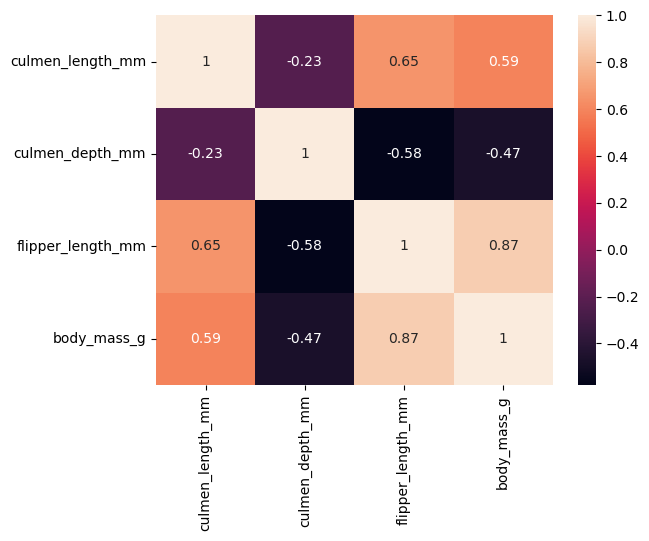

In [17]:
# correlation heatmap
sns.heatmap(penguins_size.corr(), annot = True);

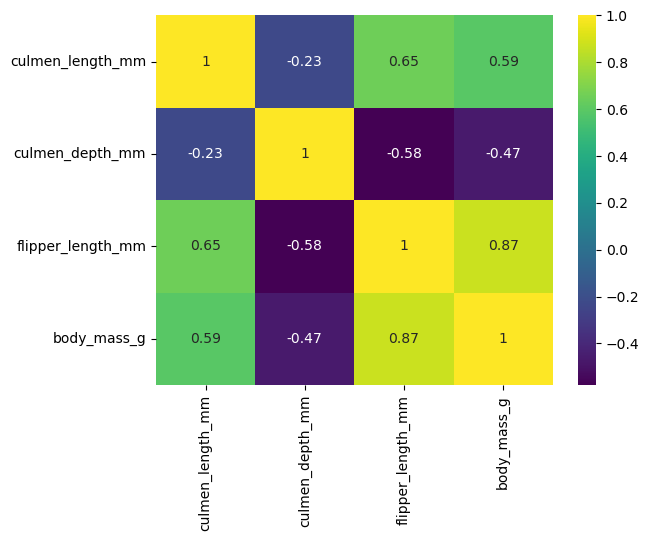

In [18]:
# correlation heatmap with cmap alternative
sns.heatmap(penguins_size.corr(), annot = True, cmap = 'viridis');

## 10. Annotations and text

### 10.1 Text

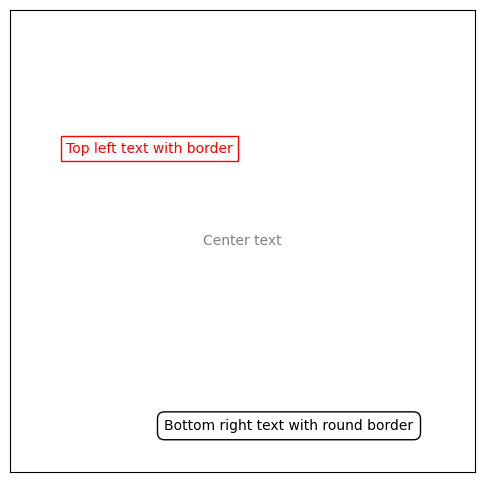

In [19]:
# text on graphs

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

# coordinates, text, color, va/ha determines if coordinate is in the center/left/right of text
# center text
ax.text(0.5, 0.5, 'Center text', color='gray', va="center", ha="center") 

# top left
ax.text(0.3, 0.7, 'Top left text with border', color='red', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='red')) #bbox sets an element for the box that wraps the text.

# bottom right
ax.text(0.6, 0.1, 'Bottom right text with round border', color='black', va="center", ha="center",
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round, pad=0.5'))

# hide ticks w/ empty list
ax.set_xticks([])
ax.set_yticks([])

plt.show()

### 10.2 Shape

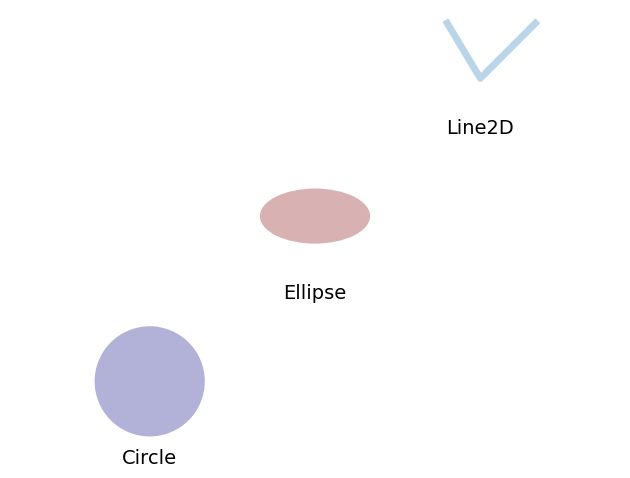

In [20]:
# shapes on graphs

def label(xy, text):
    # shift y-value to display label below shapes
    y = xy[1] - 0.15
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)

fig, ax = plt.subplots()
# create grid 3x3 to plot shapes
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

# empty patches list
patches = []

# add circle shape
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add ellipse shape
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

# add patches to collection and display
colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.jet, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

# adapt layout
plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

### 10.3 Simple annotation

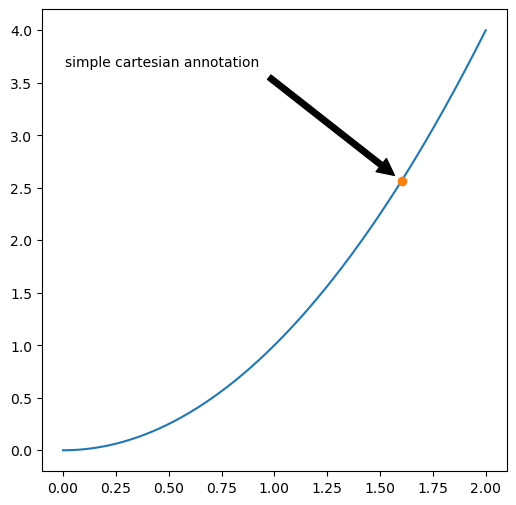

In [21]:
# annotation

# create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# generate data
x = np.linspace(0, 2, 1000)
y = x**2

line, = ax.plot(x, y)

# plot line
ind = 800
thisx, thisy = x[ind], y[ind]
ax.plot([thisx], [thisy], 'o')

# create annotation
ax.annotate('simple cartesian annotation',
            # x, y coordinates in the plot
            xy=(thisx, thisy),
            # fraction of axes width and height
            xytext=(0.05, 0.9),
            # use axes coordinates for the placement
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='top')

plt.show()

### 10.4 Bar plot annotation

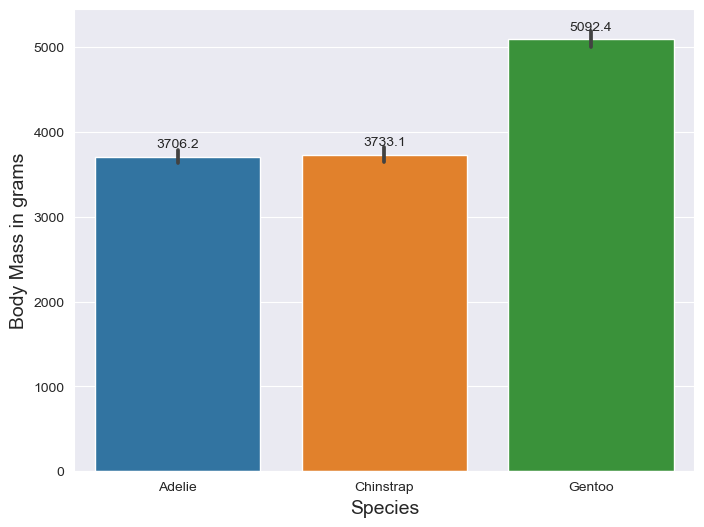

In [22]:
# display values on bars

# plot grid
sns.set_style('darkgrid')

# create species vs body_mass_g figure
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="species",y="body_mass_g",data=penguins_size)

# annotations
for p in splot.patches:
    # .1f format specifier -> what follows ., 1 digit after decimal point, float point number
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
# labels
plt.xlabel("Species", size=14)
plt.ylabel("Body Mass in grams", size=14)

plt.show();

### 10.5 Scatter plot annotation

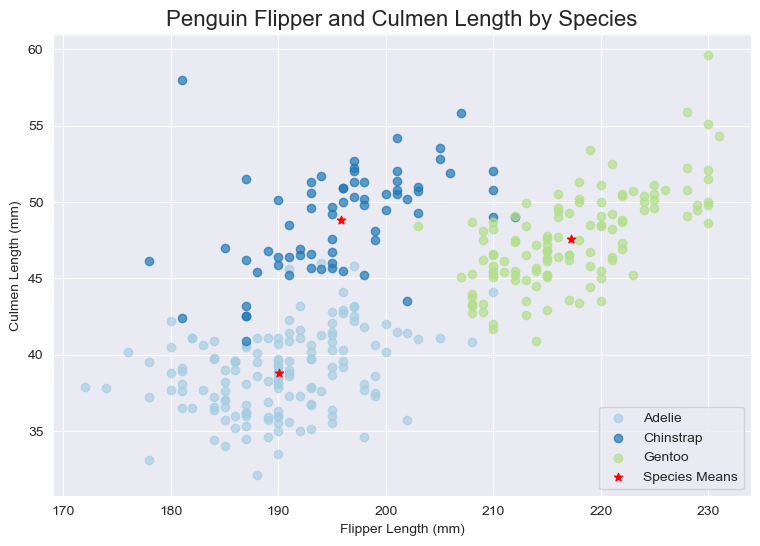

In [23]:
# display species mean

# pick color palette
colors = sns.color_palette("Paired")

# calculate means
species_means = penguins_size.groupby("species").mean()

# create subplot
fig, ax = plt.subplots(figsize=(9, 6))

# plot sizes scatter by species with alpha
for i, (grp, df) in enumerate(penguins_size.groupby("species")):
    ax.scatter(x=df["flipper_length_mm"], y=df["culmen_length_mm"],   
               label=grp, color=colors[i], alpha=0.7)

# plot means with mraket
ax.scatter(x=species_means["flipper_length_mm"], y=species_means["culmen_length_mm"],   
           label="Species Means", color="red", marker="*")

# legend and labels
ax.legend(loc="lower right")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Culmen Length (mm)")

# title
plt.title("Penguin Flipper and Culmen Length by Species", fontsize=16);

### 10.6 Span

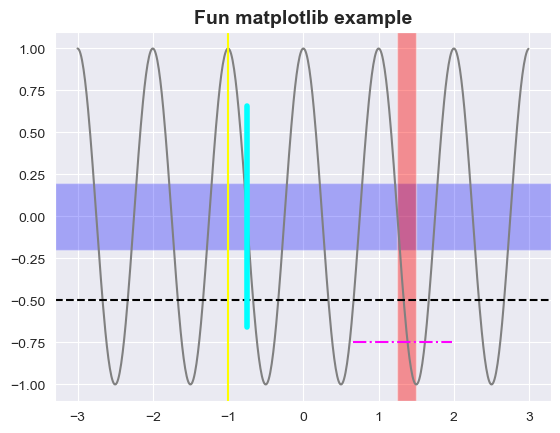

In [24]:
# data
t = np.arange(-3, 3, .01)
s = np.cos(2 * np.pi * t)

# plot data
plt.plot(t, s, color='gray')

# plot dashed horizontal line
plt.axhline(y=-0.5, color='black', linestyle='--')

# plot yellow vertical line
plt.axvline(x=-1, color='yellow')

# plot short cyan line
plt.axvline(x=-0.75, ymin=0.2, ymax=0.8, linewidth=4, color='cyan')

# plot dotted-dashed magenta line
plt.axhline(y=-0.75, xmin=0.6, xmax=0.8, color='magenta', linestyle='-.')

# create blue and red shaded regions
plt.axhspan(-0.2, 0.2, facecolor='blue', alpha=0.3)
plt.axvspan(1.25, 1.5, facecolor='red', alpha=0.4)

plt.title('Fun matplotlib example', fontsize=14, fontweight='bold')

plt.show()